In [12]:
#Cài đặt thư viện
import datetime as dt
from datetime import datetime    
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [13]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('../VCB-Historical-Data.csv')

In [14]:
#Xóa dấu , và chuyển về float
df['Price']=df['Price'].replace(',','',regex=True).astype(float)
df['Open']=df['Open'].astype(str).str.replace(',','').astype(float)
df['High']=df['High'].astype(str).str.replace(',','').astype(float)
df['Low']=df['Low'].astype(str).str.replace(',','').astype(float)
df['Change %']=df['Change %'].astype(str).str.replace('%','').astype(float)

#Thực hiện tách chuỗi KL thành 1 chuỗi số float và 1 ký tự cuối sau đó lấy số float đó nhân với 1000 
#nếu ký tự cuối là K, nếu là M thì nhân với 1000000, nếu không có K hay M thì trả về số float đó
def convert_value(value):
    if isinstance(value, str):
        if value.endswith('K'):
            return float(value[:-1]) * 1000
        elif value.endswith('M'):
            return float(value[:-1]) * 1000000
        else:
            return float(value)
    else:
        return value

df['Vol.'] = df['Vol.'].apply(convert_value)

In [15]:
# Đổi kiểu dữ liệu Date
df['Date'] = pd.to_datetime(df['Date'])

# Sort lại Date
df = df.sort_values(by='Date',ascending=True)

# reset index
df = df.reset_index(drop=True)

In [16]:
df_price = df[['Price']]

In [17]:

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df_price))
test_size = int(0.2 * len(df_price))
val_size = len(df_price) - train_size - test_size

train_data = df_price[:train_size]
test_data = df_price[train_size:train_size+test_size]
val_data = df_price[train_size+test_size:]


In [18]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [19]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [20]:
# 7. Đánh giá độ chính xác validate, test
def mda_cal(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - actual[:-1])).astype(int))

test_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Testing RMSE: {test_rmse:.2f}")
test_mape=mean_absolute_percentage_error(y_test,y_pred)
print(f"Testing MAPE: {test_mape*100:.2f}%")
mda = mda_cal(y_test, y_pred)
print(f"MDA: {mda*100:.2f}%")

val_rmse=np.sqrt(mean_squared_error(y_val,y_pred_val))
print(f"Validation RMSE: {val_rmse:.2f}")
val_mape=mean_absolute_percentage_error(y_val,y_pred_val)
print(f"Validation MAPE: {val_mape*100:.2f}%")
mda = mda_cal(y_val, y_pred_val)
print(f"MDA: {mda*100:.2f}%")

Testing RMSE: 12268.16
Testing MAPE: 14.09%
MDA: 45.70%
Validation RMSE: 5123.35
Validation MAPE: 4.84%
MDA: 55.86%


In [21]:
# Set index là dữ liệu cột Date
df = df.set_index('Date')

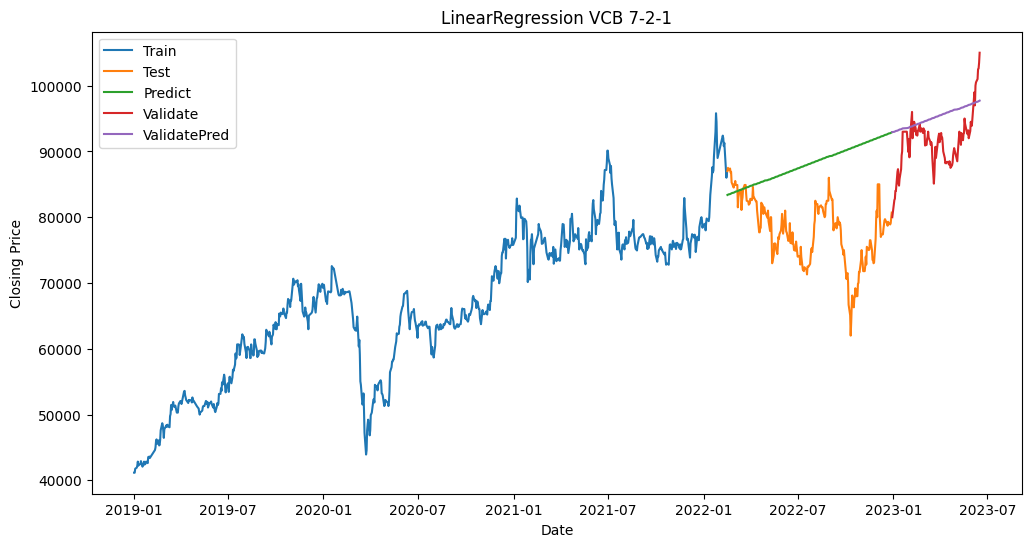

In [22]:
# 9.Vẽ hình
plt.figure(figsize=(12,6))
# Tâp train
plt.plot(df[:train_size].index, np.array([y_train]).reshape(-1, 1))

# Tập test
plt.plot( df[train_size:train_size+test_size].index, test_data)

# Tập Predict test
plt.plot( df[train_size:train_size+test_size].index, y_pred)

# Tập val
plt.plot(df[train_size+test_size:].index, val_data)

# Tập Predict val
plt.plot(df[train_size+test_size:].index, y_pred_val)

plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])
plt.title("LinearRegression VCB 7-2-1")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()